In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
files_path = '/content/dataset4.csv'
data = pd.read_csv(files_path)

In [2]:
# Obtener información general del archivo
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#Verificar valores nulos
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
#Verificar valores duplicados
data.duplicated().sum()

0

In [5]:
#Analizar variables descriptivas
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


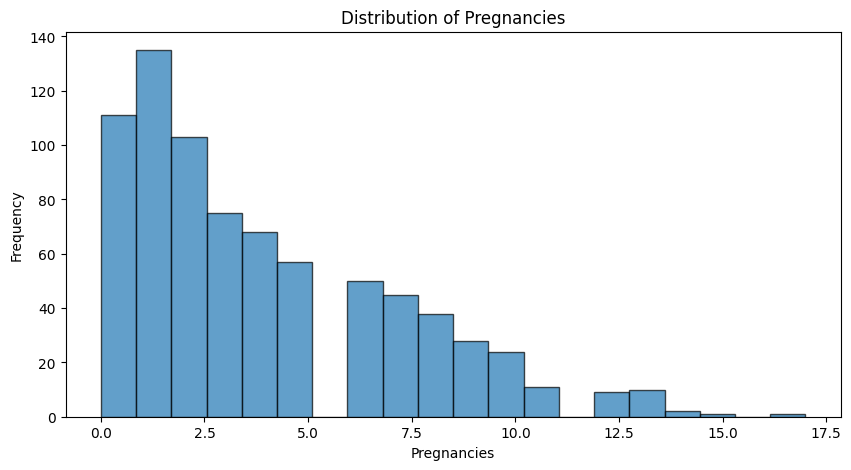

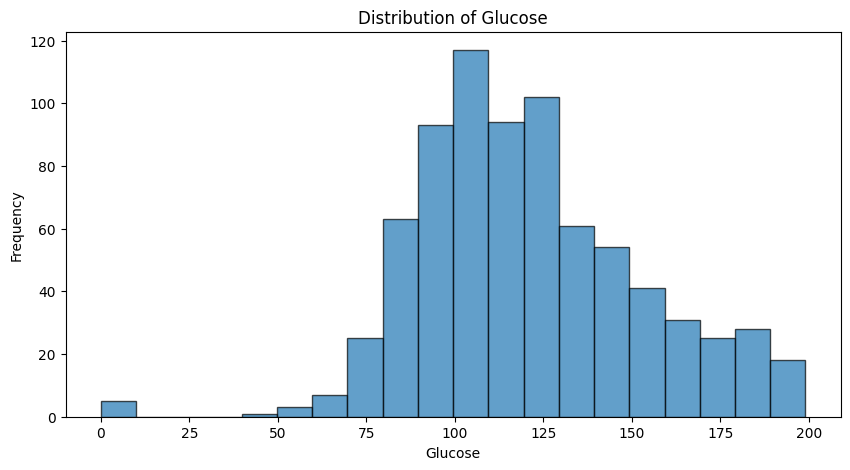

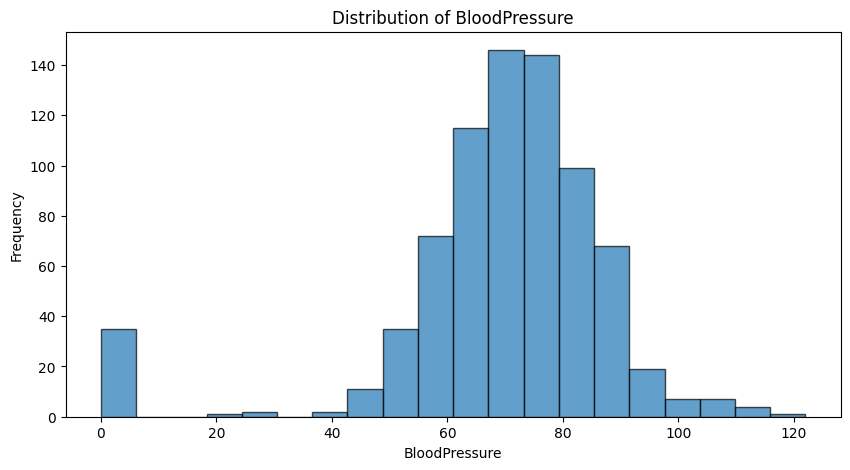

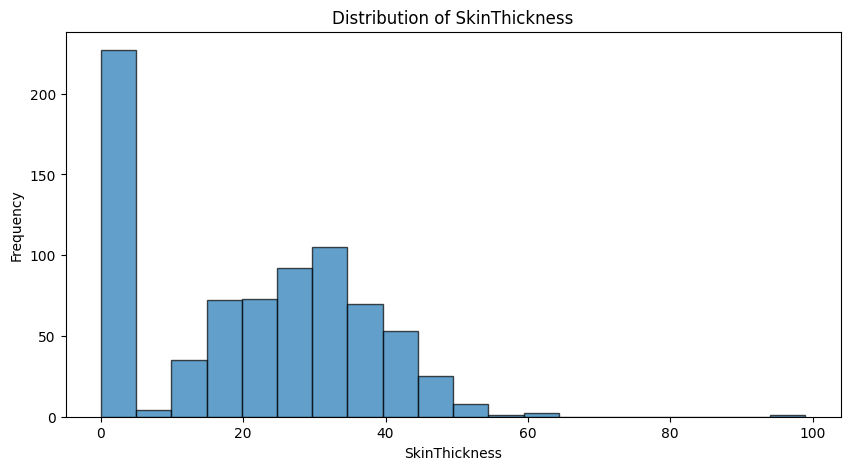

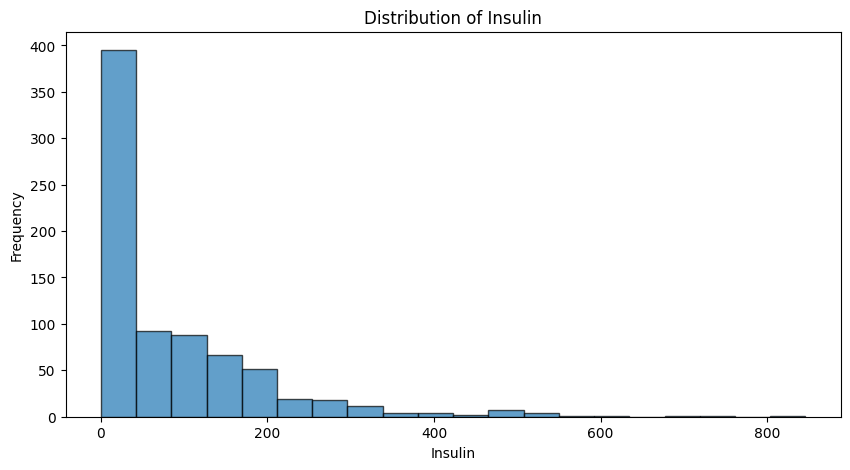

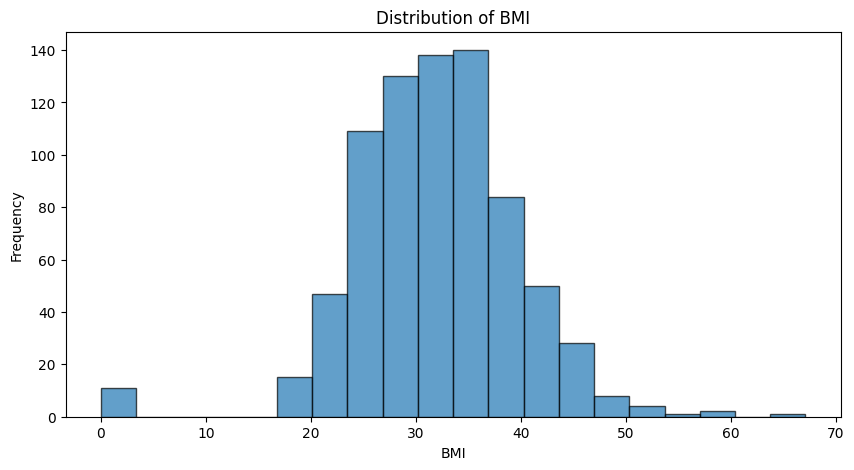

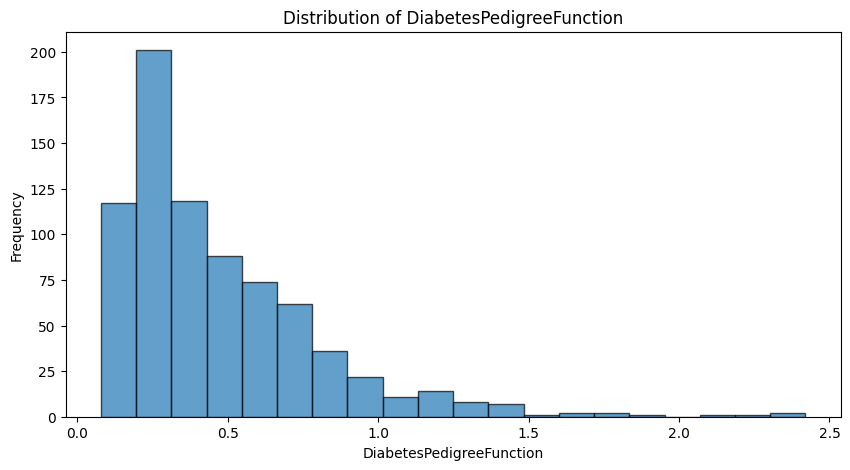

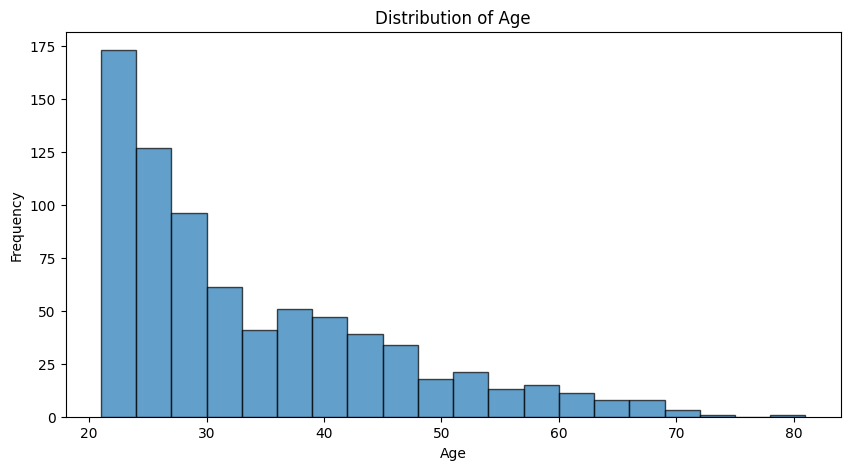

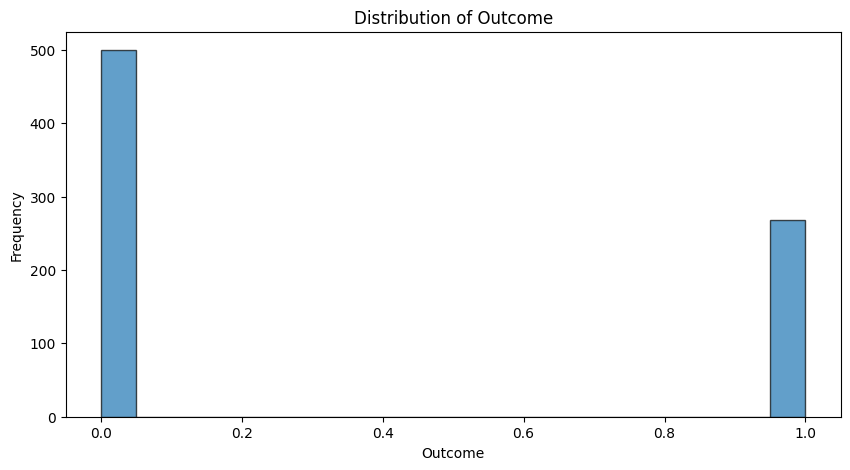

In [6]:
# Gráficos de histogramas para variables numéricas
numeric_columns_new = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns_new:
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Glucose:** Distribución ligeramente sesgada hacia valores más altos, con un pico alrededor de 120 mg/dl. Sin embargo, hay valores inusuales en 0 que podrían representar datos faltantes.

**BloodPressure:** Distribución normal con valores concentrados en torno a 70-80 mmHg. Algunos valores en 0 parecen irreales.

**SkinThickness:** Valores en 0 son frecuentes, lo que podría indicar datos faltantes. La mayoría de los valores no nulos están entre 20 y 40 mm.

**Insulin:** Amplia dispersión, con la mayoría de los valores por debajo de 200 µU/mL, pero algunos valores extremos alcanzan 846.

**BMI:** Distribución normal concentrada alrededor de 30-40, con algunos valores inusualmente bajos (0).

**DiabetesPedigreeFunction:** Ligeramente sesgada hacia la izquierda, con valores concentrados entre 0.2 y 0.8.

**Age:** Distribución sesgada hacia valores bajos, con la mayoría de los pacientes entre 21 y 40 años.

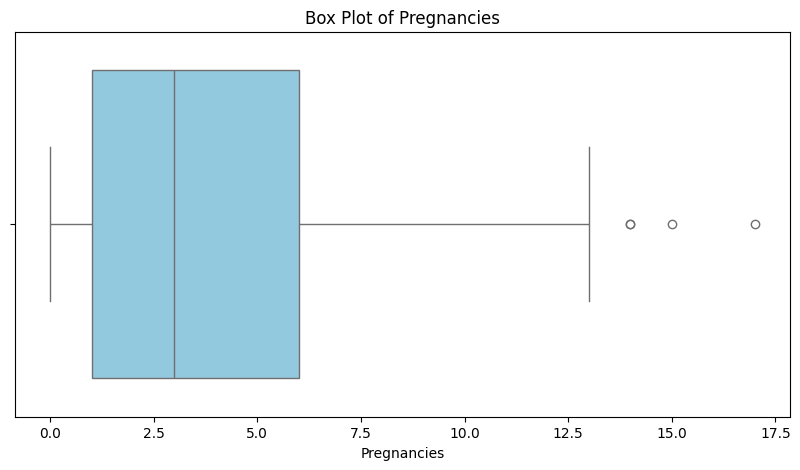

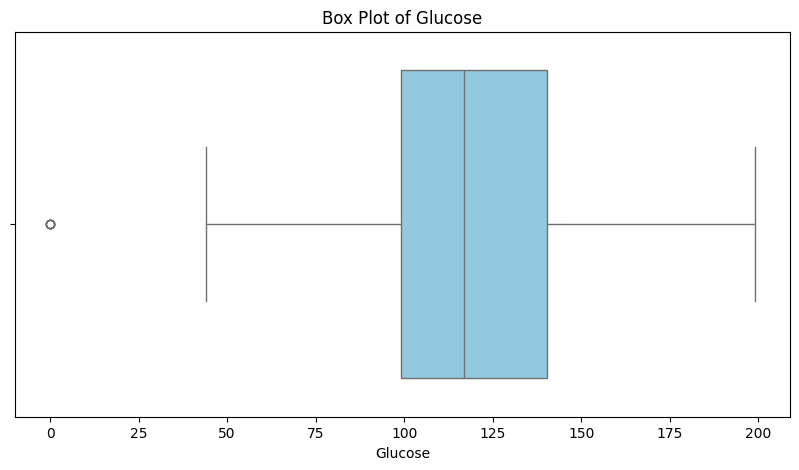

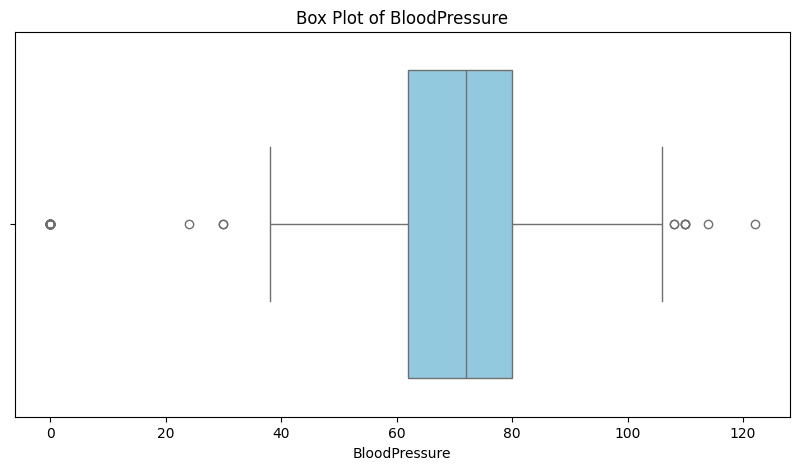

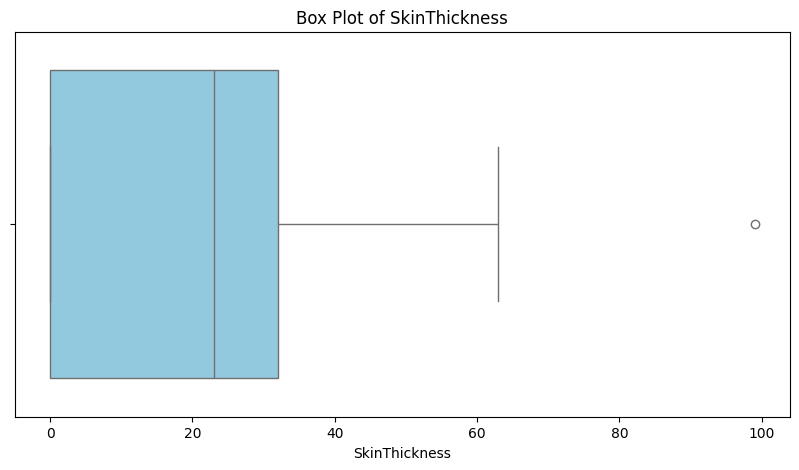

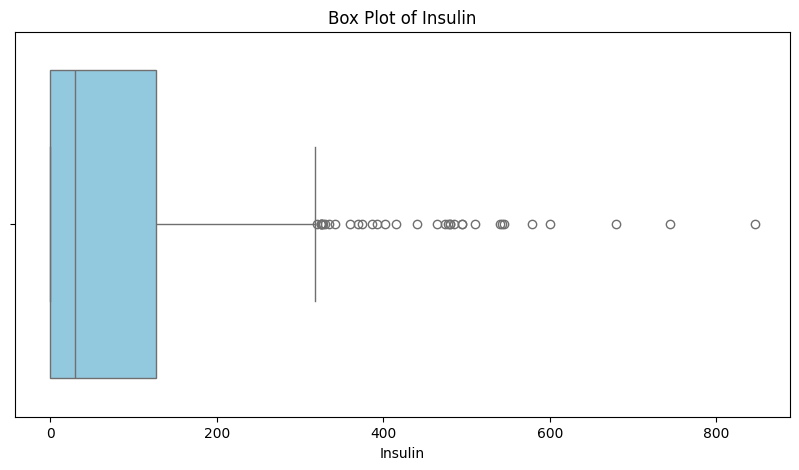

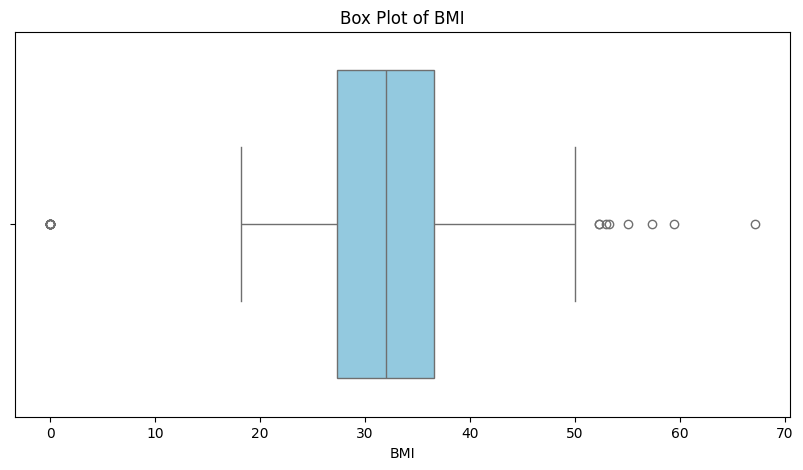

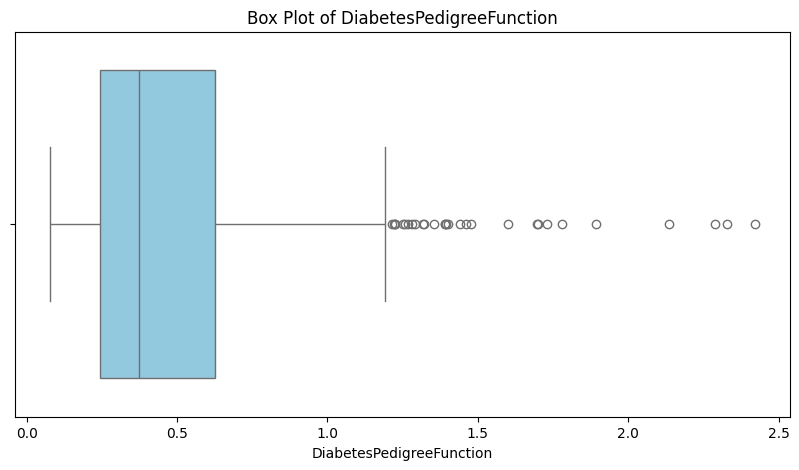

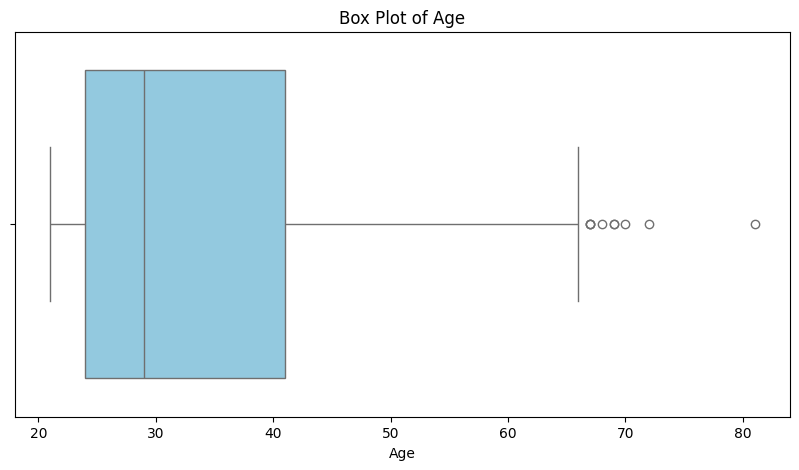

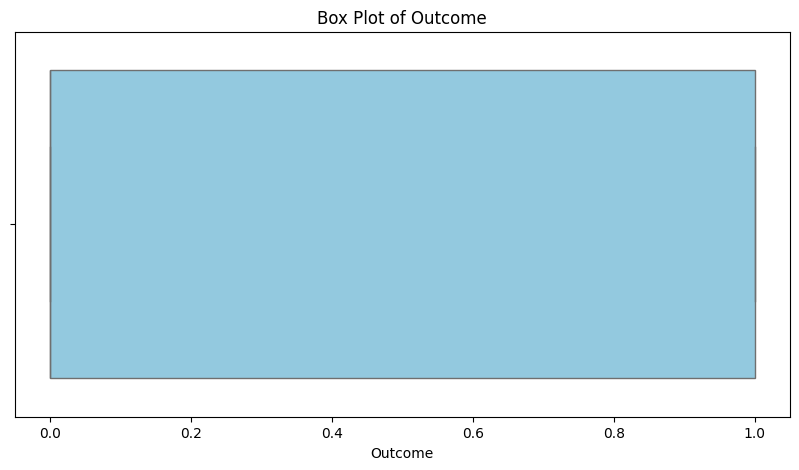

In [7]:
# Gráficos de box plots para detección de outliers
for column in numeric_columns_new:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

**Insulin:** Valores extremadamente altos (>600 µU/mL), lo que podría ser representativo de casos raros o errores en la captura de datos.

**SkinThickness y BloodPressure:** Presencia de valores extremos y ceros que afectan la variabilidad y podrían necesitar tratamiento.

**BMI:** Algunos valores en 0 destacan como poco realistas.

**Age:** No presenta outliers significativos, pero la distribución sesgada debe tenerse en cuenta.

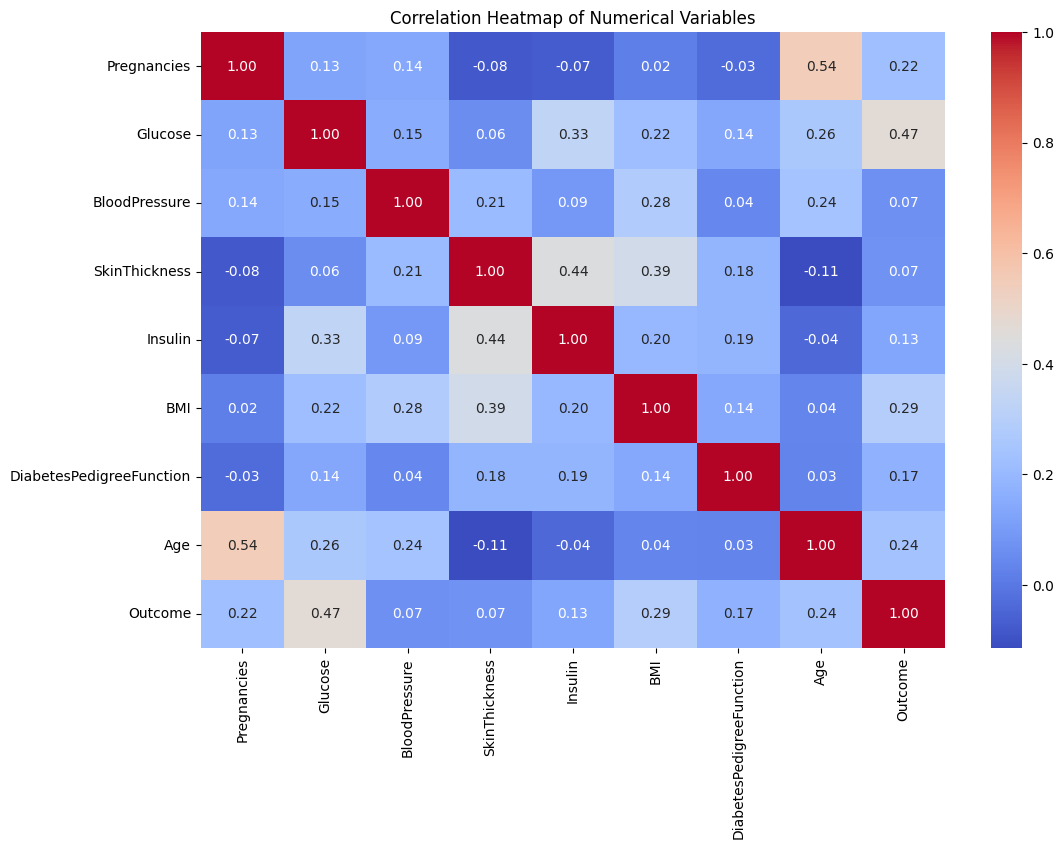

In [8]:
# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
correlation_matrix_new = data[numeric_columns_new].corr()
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


**Glucose y Outcome:** Correlación moderada positiva (~0.47), indicando que niveles más altos de glucosa están asociados con diabetes.

**BMI y Outcome:** Correlación positiva moderada (~0.31), lo que sugiere que un mayor índice de masa corporal está relacionado con diabetes.

**Age y Pregnancies:** Correlación positiva (~0.54), probablemente debido a patrones de fertilidad.

**SkinThickness y BMI:** Correlación positiva (~0.44), lo que tiene sentido dada la relación entre grasa subcutánea y peso.

# Resumen de Hallazgos

1. Variable objetivo potencial: Outcome (0: No tiene diabetes, 1: Tiene diabetes).
2. Distribución: Desbalance de clases (34.89% positivos, 65.11% negativos), lo que podría requerir técnicas de balance para un análisis efectivo.

**Tipos de datos:**

1. Variables numéricas clave:

 * Glucose: Correlación moderada positiva con Outcome (~0.47). Valores altos están asociados con diabetes.
 * BMI: Correlación positiva moderada (~0.31). Niveles altos están relacionados con un mayor riesgo de diabetes.
 * Age: Distribución sesgada hacia pacientes más jóvenes, con correlación leve con Outcome.
 * Insulin y SkinThickness: Valores extremos y ceros que necesitan tratamiento para garantizar su utilidad analítica.
 * DiabetesPedigreeFunction: Ligeramente correlacionada con Outcome, destacando antecedentes familiares como un factor de riesgo.

**Correlaciones:**

1. Relación significativa entre:
Glucose y Outcome (~0.47), indicando que niveles elevados de glucosa son un indicador clave.
2. BMI y SkinThickness (~0.44), consistente con la acumulación de grasa subcutánea.
3. Pregnancies y Age (~0.54), reflejando patrones demográficos.
4. Correlaciones bajas o débiles entre otras variables, lo que sugiere relaciones no lineales o factores indirectos.

**Desafíos del Dataset:**

1. Valores extremos:
Presentes en Insulin (valores altos >600 µU/mL) y BMI (valores inusualmente bajos).
Valores faltantes representados como ceros:
En Glucose, BloodPressure, SkinThickness, Insulin y BMI, estos ceros deben ser tratados como valores faltantes.
2. Distribución desbalanceada:
La variable Outcome está desbalanceada, lo que podría requerir técnicas como sobremuestreo o submuestreo para evitar sesgos en los modelos.
Problemática Seleccionada
3. Clasificación: Predicción del diagnóstico de diabetes (Outcome) utilizando las características clínicas y demográficas disponibles.

**Justificación:**

1. Relevancia: Detectar diabetes tempranamente ayuda a prevenir complicaciones graves y a diseñar planes de tratamiento efectivos.
2. Impacto práctico: Permitiría a los médicos y sistemas de salud priorizar pacientes en riesgo y asignar recursos eficientemente.
3. Desafío técnico: Valores faltantes representados como ceros, outliers significativos, y la distribución desbalanceada de clases complican la modelización.

**Análisis Adicional Recomendado:**

1. Tratamiento de valores faltantes:
Sustituir ceros por valores imputados (media, mediana o técnicas avanzadas).
2. Balance de clases:
Implementar técnicas como SMOTE o ajuste de pesos en los algoritmos de clasificación.
3. Selección de características:
Evaluar la importancia de cada variable y considerar la eliminación de variables con baja correlación.
4. Exploración no lineal:
Modelos como árboles de decisión o algoritmos basados en ensambles (Random Forest, XGBoost) para capturar relaciones complejas.